In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('../../data/datatraining.csv')
test_1 = pd.read_csv('../../data/dataset.csv')
test_2 = pd.read_csv('../../data/datatest2.csv')

In [3]:
train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,04-02-2015 17:51,23.18,27.2720,426.0,721.25,0.004793,1
1,04-02-2015 17:51,23.15,27.2675,429.5,714.00,0.004783,1
2,04-02-2015 17:53,23.15,27.2450,426.0,713.50,0.004779,1
3,04-02-2015 17:54,23.15,27.2000,426.0,708.25,0.004772,1
4,04-02-2015 17:55,23.10,27.2000,426.0,704.50,0.004757,1


In [4]:
test_1.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,02-02-2015 14:19,23.7000,26.272,585.200000,749.200000,0.004764,1
1,02-02-2015 14:19,23.7180,26.290,578.400000,760.400000,0.004773,1
2,02-02-2015 14:21,23.7300,26.230,572.666667,769.666667,0.004765,1
3,02-02-2015 14:22,23.7225,26.125,493.750000,774.750000,0.004744,1
4,02-02-2015 14:23,23.7540,26.200,488.600000,779.000000,0.004767,1


In [5]:
test_2.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,11-02-2015 14:48,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,11-02-2015 14:49,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,11-02-2015 14:50,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,11-02-2015 14:51,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,11-02-2015 14:51,21.7900,31.133333,437.333333,1005.666667,0.005030,1


We check the null values in the dataset

In [9]:
print(train.isnull().sum())
print()
print(test_1.isnull().sum())
print()
print()
print(test_2.isnull().sum())

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


In [32]:
X_train = train.iloc[:,1:6].values
y_train = train.iloc[:,-1].values
X_test1 = test_1.iloc[:,1:6].values
y_test1 = test_1.iloc[:,-1].values
X_test2 = test_2.iloc[:,1:6].values
y_test2 = test_2.iloc[:,-1].values

<b>Visualisation of dataset </b>

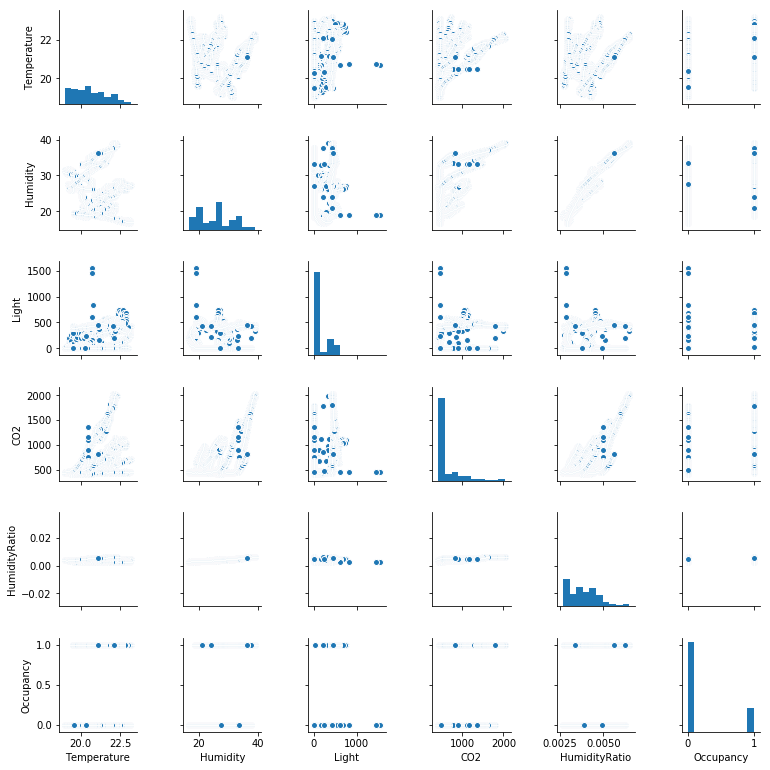

In [34]:
cols = ['date', 'Temperature','Humidity','Light','CO2','HumidityRatio','Occupancy']
sns.pairplot(train[cols],size = 1.8)
plt.tight_layout()

Co-relation between each attribute

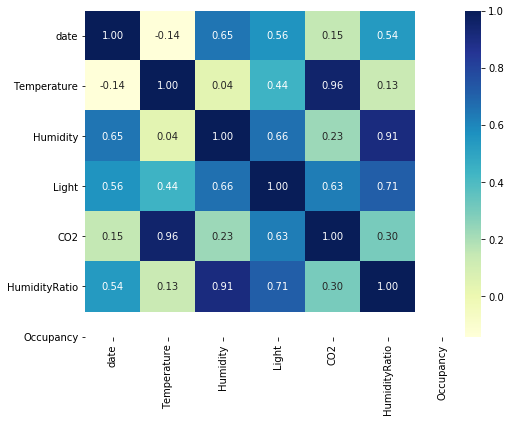

In [11]:
fig , ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(train[cols].corr(),annot = True,fmt ='.2f', cmap="YlGnBu",yticklabels=cols,xticklabels=cols)  
#correlation value between each attribute

<b>Data Preprocessing </b>
scaling independent variables

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test1 = sc.transform(X_test1)
X_test2 = sc.transform(X_test2)

<b> Decision Tree </b>

Training the model

In [36]:
from sklearn.tree import DecisionTreeClassifier
#training with gini index, lower the gini index more will be prefereed
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [37]:
#train using entropy
clf_entropy =  DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
clf_entropy.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

<b>PREDICTION </b>

Prediction using gini index for test 1

In [38]:
y_pred = clf_gini.predict(X_test1)
y_pred


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Prediction using entropy for test 1

In [39]:
x_pred = clf_entropy.predict(X_test1)
x_pred


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

Prediction using gini for test 2

In [40]:
t_pred = clf_gini.predict(X_test2)
t_pred


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Prediction using entropy for test 2

In [41]:
z_pred = clf_entropy.predict(X_test2)
z_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

<b>Calculate accuracy </b>

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
     
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
     
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
     
    print("Report : ",
    classification_report(y_test, y_pred))

###### Accuracy for test1 and test2 using gini index

In [44]:
cal_accuracy(y_test1 , y_pred)                #TEST1

Confusion Matrix:  [[1640   53]
 [   5  967]]
Accuracy :  97.82363977485929
Report :               precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      0.99      0.97       972

avg / total       0.98      0.98      0.98      2665



In [45]:
cal_accuracy(y_test2 , t_pred) 

Confusion Matrix:  [[7648   55]
 [  12 2037]]
Accuracy :  99.3129614438064
Report :               precision    recall  f1-score   support

          0       1.00      0.99      1.00      7703
          1       0.97      0.99      0.98      2049

avg / total       0.99      0.99      0.99      9752



<b> Accuracy for test1 and test2 using entropy </b>

In [46]:
cal_accuracy(y_test1 , x_pred) 

Confusion Matrix:  [[1660   33]
 [  89  883]]
Accuracy :  95.42213883677299
Report :               precision    recall  f1-score   support

          0       0.95      0.98      0.96      1693
          1       0.96      0.91      0.94       972

avg / total       0.95      0.95      0.95      2665



In [47]:
cal_accuracy(y_test2 , z_pred) 

Confusion Matrix:  [[7336  367]
 [ 425 1624]]
Accuracy :  91.8785890073831
Report :               precision    recall  f1-score   support

          0       0.95      0.95      0.95      7703
          1       0.82      0.79      0.80      2049

avg / total       0.92      0.92      0.92      9752



<b> So by using gini index in decision trees we are getting more accurate result than entropy <b>